rBergomi: obtaining erB surface
==

$$S_t = \mathcal{E} \left\{ \int_0^t \sqrt{ V_u } \ \mathrm{d} \ (\rho W^1_u + \bar{\rho} W^2_u) \right\}, \quad V_t = \xi \ \mathcal{E} \left\{ \eta \sqrt{2\alpha + 1} \int_0^t (t - u)^\alpha \mathrm{d}W^1_u \right\},$$

In [1]:
import os
os.chdir('/Users/ryanmccrickerd/desktop/turbo_rbergomi/rbergomi')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import xlwings as xw
from rbergomi import rBergomi
from surface import Surface
from routines import *
% matplotlib inline

Set antithetic sampling here

SHOULD ONLY HAVE TO EDIT BELOW

In [3]:
tenor = '1Y'
T = 1.
a = 0.4 # set skew decay

In [4]:
N = 400000 # Change to 400,000
n = int(2. / T)

##### SET THESE FOR ALL #####
b = -0.4 # set smile decay
zeta = -1. # 1.9 * -0.9 # change to -1
eta = 2. # 1.9 * np.sqrt(1 - 0.9**2) # change to 1
xi = 0.1**2 # 0.235**2

rB1 = rBergomi(n = n, N = N, T = T, a = a, AS = True)
rB2 = rBergomi(n = n, N = N, T = T, a = b, AS = True)

install_path = '/Users/ryanmccrickerd/desktop'
file_path = install_path + '/turbo_rbergomi/data/erB_' + tenor + '.xlsx'

1completed
2completed
3completed
4completed
5completed


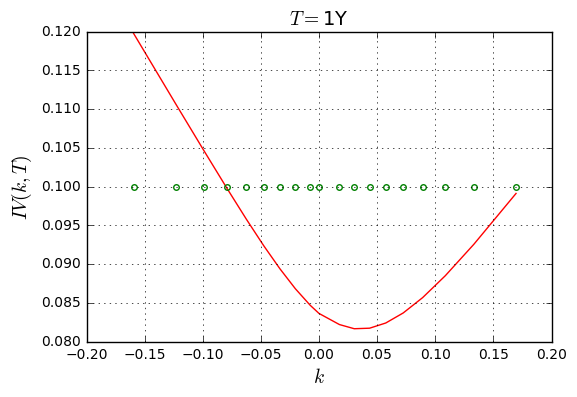

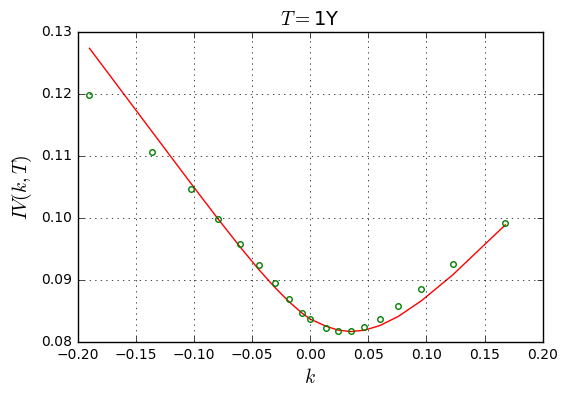

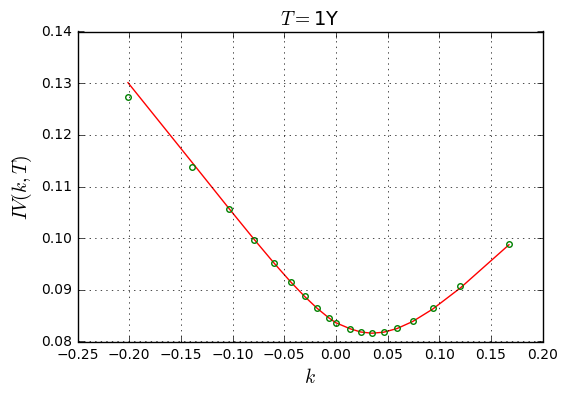

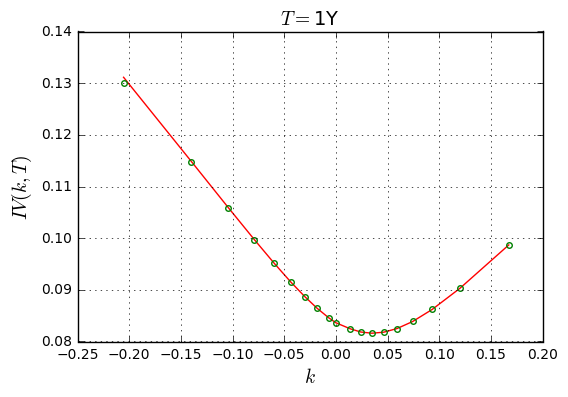

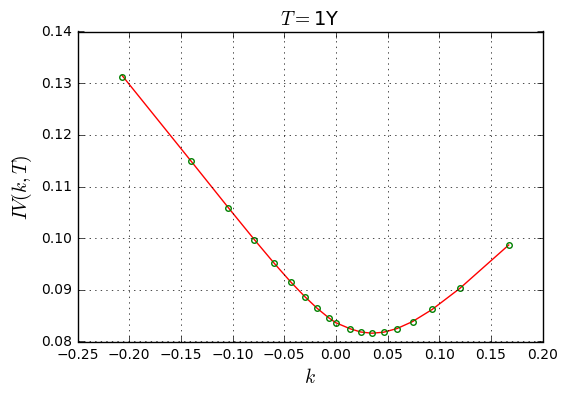

In [5]:
i = 0
for i in range(5):
    surface = Surface(tenor, 'erB', close = False)
    np.random.seed(0)
    dW11 = rB1.dW1()
    dW12 = dW11[:,:,0]
    dW21 = rB2.dW1()
    Y1 = rB1.Y(dW11)
    Y2 = rB2.Y(dW21)
    dB1 = rB1.dB(dW11, dW12, rho = 1.) 
    V1 = rB1.V(Y1, xi = 1.0, eta = zeta)
    V2 = rB2.V(Y2, xi = 1.0, eta = eta)
    V = xi * V1 * V2
    S = rB1.S(V, dB1)
    C = rB1.C(S, surface)
    IV = rB1.IV(C, surface)

    # Instantiate xlwings object
    wb = xw.Book(file_path)
    sht = wb.sheets['Sheet1']

    # Paste implied vols
    sht.range('B6').value = 100 * np.flipud(np.transpose(IV))
    wb.save()

    k = np.array(surface._log_strike_surface())
    MV = np.array(surface.surface)

    plot, axes = plt.subplots()
    axes.plot(k[0,:], IV[0,:], 'r')
    axes.plot(k[0,:], MV[0,:], 'go', fillstyle = 'none', ms = 4, mew = 1)
    axes.set_xlabel(r'$k$', fontsize = 14)
    axes.set_ylabel(r'$IV(k,T)$', fontsize = 14)
    axes.set_title(r'$T=$' + surface._tenors[0], fontsize = 14)
    plt.grid(True)
    print(str(i + 1) + 'completed')

Need to complete for a = 0 and a = -0.4 now.